<a href="https://colab.research.google.com/github/PreethamThinagaraj/Projects/blob/main/%5CNatural%20Scene%20Image%20Classification%5CResearch_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import matplotlib.image as mpimg
import PIL
from glob import glob

In [ ]:
  #Mounting to the google drive where the data is uploaded
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Colab Notebooks/Research Methods/archive (1).zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
train_path = "/content/seg_train/seg_train"
test_path = "/content/seg_test/seg_test"

Checking the number of folders in the seg_train folder

In [ ]:
folders = glob('/content/seg_train/seg_train/*')
len(folders)

6

Getting a count of number of images present in each folder

In [ ]:
os.listdir(train_path)

['forest', 'street', 'buildings', 'sea', 'mountain', 'glacier']

In [ ]:
training_images_len = []
for category in os.listdir(train_path):
    num_images = len(os.listdir(os.path.join(train_path, category)))
    training_images_len.append(num_images)
    print(f'Total {category} images:', num_images)

print(f'Total training images: {np.sum(training_images_len)}')
print('-'*60)

testing_images_len = []
for category in os.listdir(test_path):
    num_images = len(os.listdir(os.path.join(test_path, category)))
    testing_images_len.append(num_images)
    print(f'Total {category} images:', num_images)
print(f'All testing images: {np.sum(testing_images_len)}')

Total forest images: 2271
Total street images: 2382
Total buildings images: 2191
Total sea images: 2274
Total mountain images: 2512
Total glacier images: 2404
Total training images: 14034
------------------------------------------------------------
Total forest images: 474
Total street images: 501
Total buildings images: 437
Total sea images: 510
Total mountain images: 525
Total glacier images: 553
All testing images: 3000


Plotting Random images

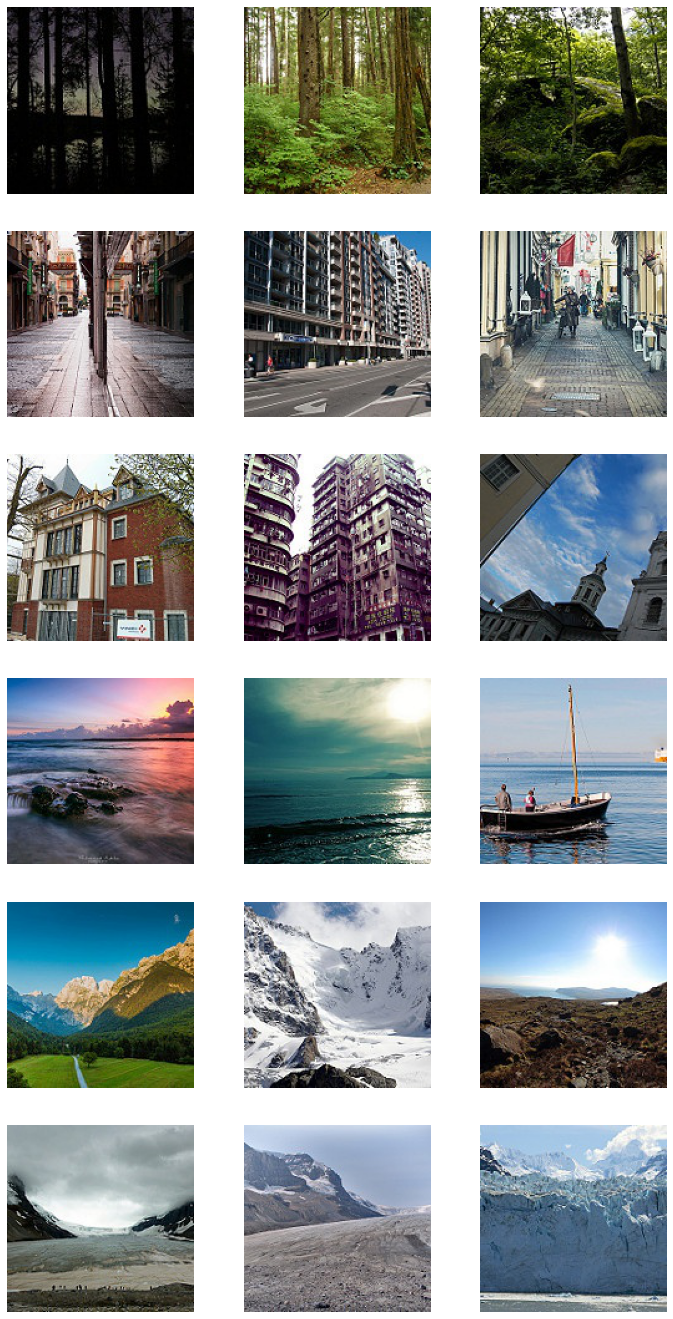

In [ ]:
nrows = 6
ncols = 3
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# 3 images per category
images_to_show = []
for category in os.listdir(train_path):
    images_to_show.append([os.path.join(train_path, category, fname) 
                           for fname in os.listdir(os.path.join(train_path, category))[0:ncols]])

# The previous code outputs a list of lists, this flattens the list
images_to_show = list(itertools.chain.from_iterable(images_to_show))
    
for i, img_path in enumerate(images_to_show):
    # set up subplot (indices start at 1)
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off') 
    
    # show images
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

Considering a random image to understand the features of the image

In [ ]:
path="/content/seg_train/seg_train/buildings/1001.jpg"

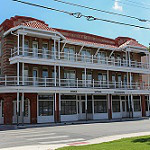

In [ ]:
PIL.Image.open(str(path))

In [ ]:
image = PIL.Image.open(str(path))

width, height = image.size

In [ ]:
print(width, height)

150 150


In [ ]:
image.format

'JPEG'

In [ ]:
image.mode

'RGB'

In [ ]:
def color_hist_visualization(image_path, figsize=(16, 4)):
    plt.figure(figsize=figsize)
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.axis("off")
    
    colors = ["red", "green", "blue"]
    for i in range(len(colors)):
        plt.subplot(1, 4, i + 2)
        plt.hist(
            img[:, :, i].reshape(-1),
            bins=25,
            alpha=0.5,
            color=colors[i],
            density=True
        )
        plt.xlim(0, 255)
        plt.xticks([])
        plt.yticks([])
    
    
    plt.show()

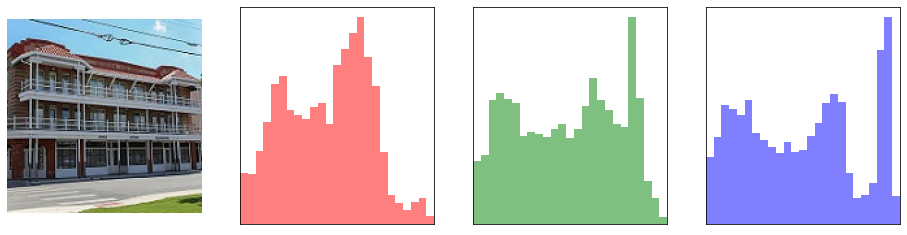

In [ ]:
color_hist_visualization(str(path))

In [ ]:
def channels_visualization(image_path, figsize=(16, 4)):
    plt.figure(figsize=figsize)
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.subplot(1, 4, 1)
    plt.imshow(np.mean(img, axis=2), cmap="gray")
    plt.axis('off')
    
    for i in range(3):
        plt.subplot(1, 4, i + 2)
        tmp_img = np.full_like(img, 0)
        tmp_img[:, :, i] = img[:, :, i]
        plt.imshow(tmp_img)
        plt.xlim(0, 255)
        plt.xticks([])
        plt.yticks([])
    
    
    plt.show()

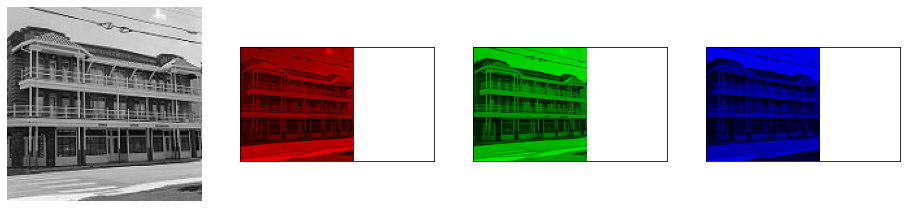

In [ ]:
channels_visualization(str(path))

In [ ]:
def grayscale_visualization(image_path, figsize=(8, 4)):
    plt.figure(figsize=figsize)
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    tmp_img = np.full_like(img, 0)
    for i in range(3):
        tmp_img[:, :, i] = img.mean(axis=-1)
    plt.imshow(tmp_img)
    plt.axis('off')
    
    
    plt.show()

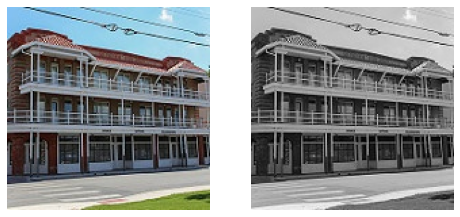

In [ ]:
grayscale_visualization(str(path))

In [ ]:
pix_val = list(image.getdata())
pix_val_flat = [x for sets in pix_val for x in sets]
print("Pixel Values :",pix_val_flat)

Pixel Values : [131, 194, 247, 131, 194, 245, 131, 194, 245, 131, 194, 245, 131, 195, 243, 131, 195, 243, 131, 195, 241, 132, 194, 241, 133, 196, 240, 134, 195, 239, 140, 198, 238, 136, 190, 228, 101, 151, 186, 44, 90, 123, 0, 43, 72, 0, 23, 50, 25, 58, 77, 93, 129, 143, 175, 215, 225, 165, 213, 223, 149, 205, 220, 139, 203, 231, 130, 198, 243, 133, 210, 255, 120, 201, 255, 116, 200, 255, 115, 198, 252, 119, 197, 245, 126, 197, 243, 136, 196, 246, 140, 193, 247, 141, 187, 246, 141, 192, 235, 139, 193, 237, 136, 193, 236, 137, 191, 235, 139, 192, 236, 142, 194, 241, 137, 194, 239, 132, 189, 234, 142, 196, 242, 139, 190, 235, 140, 194, 238, 134, 202, 241, 121, 201, 236, 120, 203, 237, 129, 203, 240, 132, 195, 236, 139, 194, 235, 134, 191, 234, 136, 197, 241, 139, 198, 238, 150, 205, 236, 146, 194, 217, 100, 142, 158, 62, 98, 112, 71, 103, 118, 122, 148, 165, 170, 191, 210, 182, 203, 222, 168, 199, 219, 153, 199, 222, 141, 205, 232, 133, 208, 239, 136, 200, 244, 137, 205, 244, 136, 209, 2

Image augmentation 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                fill_mode='nearest',
                                validation_split=0.2)


test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 subset="training",
                                                 class_mode = 'categorical')

Found 11230 images belonging to 6 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 subset="validation",
                                                 class_mode = 'categorical')

Found 2804 images belonging to 6 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(test_path,
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 3000 images belonging to 6 classes.


In [ ]:
train_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
val_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
test_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

Model Implementaion

In [ ]:
## VGG 16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Input,Flatten
from tensorflow.keras import Model,layers

In [ ]:
IMG_SIZE=224
img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [ ]:
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

553467904/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
last_layer = model.get_layer('fc2').output
out = Dense(6, activation='sigmoid', name='output')(last_layer)  ## 6 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [ ]:
history = model.fit_generator(train_generator,
                               epochs=10, 
                               validation_data=val_generator,
                               steps_per_epoch=len(train_generator),
                               validation_steps=len(val_generator),
                               callbacks=my_callbacks)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
88/88 [==============================] - 161s 2s/step - loss: 1.4051 - acc: 0.4555 - val_loss: 0.7613 - val_acc: 0.7147
Epoch 2/10
88/88 [==============================] - 124s 1s/step - loss: 0.7245 - acc: 0.7244 - val_loss: 0.6764 - val_acc: 0.7504
Epoch 3/10
88/88 [==============================] - 123s 1s/step - loss: 0.6300 - acc: 0.7655 - val_loss: 0.5837 - val_acc: 0.7850
Epoch 4/10
88/88 [==============================] - 122s 1s/step - loss: 0.5906 - acc: 0.7770 - val_loss: 0.5717 - val_acc: 0.7817
Epoch 5/10
88/88 [==============================] - 122s 1s/step - loss: 0.5550 - acc: 0.7932 - val_loss: 0.5439 - val_acc: 0.7910
Epoch 6/10
88/88 [==============================] - 121s 1s/step - loss: 0.5414 - acc: 0.7879 - val_loss: 0.5442 - val_acc: 0.7885
Epoch 7/10
88/88 [==============================] - 123s 1s/step - loss: 0.5462 - acc: 0.7981 - val_loss: 0.5238 - val_acc: 0.8078
Epoch 8/10
88/88 [==============================] - 123s 1s/step - loss: 0.5166 - a

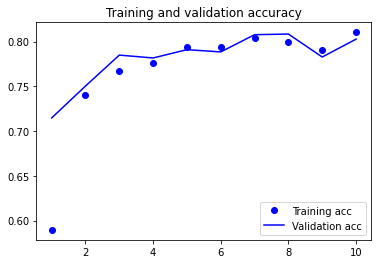

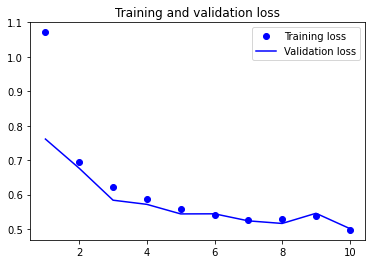

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_generator)

24/24 [==============================] - 10s 410ms/step - loss: 0.4365 - acc: 0.8320


[0.43649256229400635, 0.8320000171661377]

VGG19

In [ ]:
from tensorflow.keras.applications import VGG19

In [ ]:
model = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

574717952/574710816 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
last_layer = model.get_layer('fc2').output
out = Dense(6, activation='sigmoid', name='output')(last_layer)  ## 6 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early_stopping=EarlyStopping(patience=4,verbose=1,restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(factor=0.1,patience=3,verbose=1)

my_callbacks = [early_stopping, reduce_lr]

In [ ]:
history = model.fit_generator(train_generator,
                               epochs=10, 
                               validation_data=val_generator,
                               steps_per_epoch=len(train_generator),
                               validation_steps=len(val_generator),
                               callbacks=my_callbacks)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
88/88 [==============================] - 123s 1s/step - loss: 1.3697 - acc: 0.4526 - val_loss: 0.7644 - val_acc: 0.7068
Epoch 2/10
88/88 [==============================] - 121s 1s/step - loss: 0.7487 - acc: 0.7060 - val_loss: 0.6811 - val_acc: 0.7265
Epoch 3/10
88/88 [==============================] - 121s 1s/step - loss: 0.6517 - acc: 0.7507 - val_loss: 0.6281 - val_acc: 0.7589
Epoch 4/10
88/88 [==============================] - 121s 1s/step - loss: 0.6218 - acc: 0.7548 - val_loss: 0.6051 - val_acc: 0.7693
Epoch 5/10
88/88 [==============================] - 121s 1s/step - loss: 0.5814 - acc: 0.7788 - val_loss: 0.5842 - val_acc: 0.7703
Epoch 6/10
88/88 [==============================] - 121s 1s/step - loss: 0.5782 - acc: 0.7770 - val_loss: 0.5755 - val_acc: 0.7760
Epoch 7/10
88/88 [==============================] - 121s 1s/step - loss: 0.5677 - acc: 0.7854 - val_loss: 0.5737 - val_acc: 0.7771
Epoch 8/10
88/88 [==============================] - 120s 1s/step - loss: 0.5605 - a

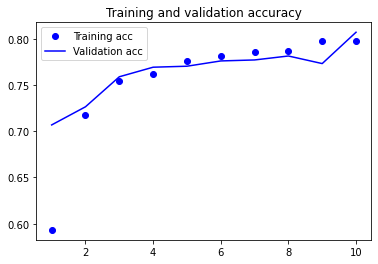

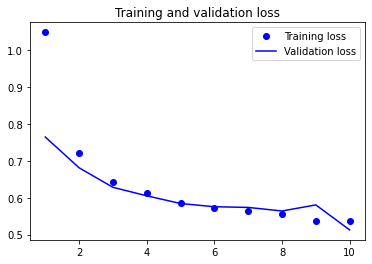

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.46383658051490784, 0.8243333101272583]

Inception

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
inception=InceptionV3(input_tensor=img_input,weights='imagenet',include_top=False)
inception.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________

In [ ]:
for layer in inception.layers:
    layer.trainable=False

#our layers 
x=Flatten()(inception.output)

prediction=Dense(6,activation='softmax')(x)

model=Model(inputs=inception.input,outputs=prediction)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stopping=EarlyStopping(patience=4,verbose=1,restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(factor=0.1,patience=3,verbose=1)

my_callbacks = [early_stopping, reduce_lr]

In [ ]:
history = model.fit_generator(train_generator,
                               epochs=10, 
                               validation_data=val_generator,
                               steps_per_epoch=len(train_generator),
                               validation_steps=len(val_generator),
                               callbacks=my_callbacks)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
88/88 [==============================] - 125s 1s/step - loss: 3.6087 - accuracy: 0.6463 - val_loss: 0.7443 - val_accuracy: 0.8420
Epoch 2/10
88/88 [==============================] - 118s 1s/step - loss: 0.7384 - accuracy: 0.8548 - val_loss: 0.7698 - val_accuracy: 0.8606
Epoch 3/10
88/88 [==============================] - 119s 1s/step - loss: 0.6820 - accuracy: 0.8647 - val_loss: 0.8360 - val_accuracy: 0.8520
Epoch 4/10
88/88 [==============================] - 118s 1s/step - loss: 0.7002 - accuracy: 0.8686 - val_loss: 0.9896 - val_accuracy: 0.8420

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/10
88/88 [==============================] - 118s 1s/step - loss: 0.5470 - accuracy: 0.8912 - val_loss: 0.6355 - val_accuracy: 0.8798
Epoch 6/10
88/88 [==============================] - 118s 1s/step - loss: 0.4732 - accuracy: 0.8960 - val_loss: 0.6070 - val_accuracy: 0.8741
Epoch 7/10
88/88 [==============================] - 118s 1s/step - loss:

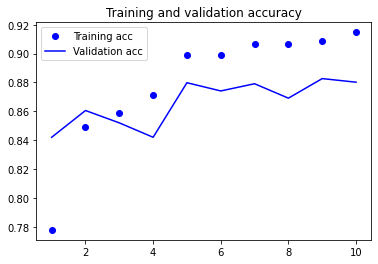

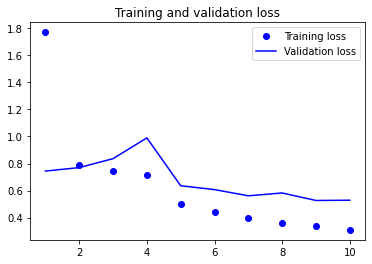

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.40892475843429565, 0.8970000147819519]

ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
resnet=ResNet50(input_tensor=img_input,weights='imagenet',include_top=False)
resnet.summary()

94773248/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________

In [ ]:
for layer in resnet.layers[:-1]:
    layer.trainable=False

last_layer=resnet.output 

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer) 

# Add dense layer to the final output layer
output_layer=layers.Dense(6,activation='softmax')(flatten)

# Creating modle with input and output layer
model=Model(inputs=resnet.input,outputs=output_layer)

# Summarize the model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stopping=EarlyStopping(patience=4,verbose=1,restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(factor=0.1,patience=3,verbose=1)

my_callbacks = [early_stopping, reduce_lr]

In [ ]:
history = model.fit_generator(train_generator,
                               epochs=10, 
                               validation_data=val_generator,
                               steps_per_epoch=len(train_generator),
                               validation_steps=len(val_generator),
                               callbacks=my_callbacks)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
88/88 [==============================] - 126s 1s/step - loss: 4.0813 - accuracy: 0.3029 - val_loss: 1.2273 - val_accuracy: 0.5210
Epoch 2/10
88/88 [==============================] - 121s 1s/step - loss: 1.1781 - accuracy: 0.5148 - val_loss: 1.2557 - val_accuracy: 0.5410
Epoch 3/10
88/88 [==============================] - 121s 1s/step - loss: 1.1782 - accuracy: 0.5289 - val_loss: 1.1478 - val_accuracy: 0.5296
Epoch 4/10
88/88 [==============================] - 121s 1s/step - loss: 1.1152 - accuracy: 0.5543 - val_loss: 1.3506 - val_accuracy: 0.4786
Epoch 5/10
88/88 [==============================] - 120s 1s/step - loss: 1.1062 - accuracy: 0.5710 - val_loss: 0.9634 - val_accuracy: 0.6309
Epoch 6/10
88/88 [==============================] - 121s 1s/step - loss: 1.0001 - accuracy: 0.6046 - val_loss: 1.0671 - val_accuracy: 0.6123
Epoch 7/10
88/88 [==============================] - 121s 1s/step - loss: 1.0296 - accuracy: 0.5972 - val_loss: 1.0434 - val_accuracy: 0.6123
Epoch 8/10
88

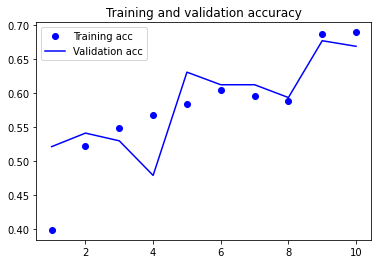

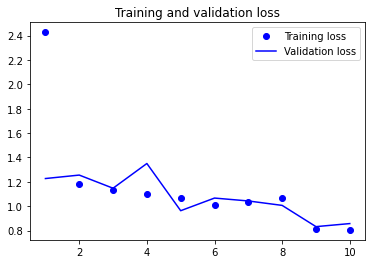

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.823173999786377, 0.6733333468437195]

Xception

In [ ]:
from keras.applications import Xception


In [ ]:
xception=Xception(input_tensor=img_input,weights='imagenet',include_top=False)

83689472/83683744 [==============================] - 0s 0us/step


In [ ]:
xception.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
for layer in xception.layers:
    layer.trainable=False
# add a global spatial average pooling layer
x = xception.output
x = layers.GlobalAveragePooling2D()(x)
# add a fully-connected layer
x = layers.Dense(512, activation='relu')(x)
# and a fully connected output/classification layer
predictions = layers.Dense(6, activation='softmax')(x)
# create the full network so we can train on it
model = Model(inputs=xception.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stopping=EarlyStopping(patience=4,verbose=1,restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(factor=0.1,patience=3,verbose=1)

my_callbacks = [early_stopping, reduce_lr]

In [ ]:
history = model.fit_generator(train_generator,
                               epochs=10, 
                               validation_data=val_generator,
                               steps_per_epoch=len(train_generator),
                               validation_steps=len(val_generator),
                               callbacks=my_callbacks)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
88/88 [==============================] - 126s 1s/step - loss: 0.6687 - accuracy: 0.7353 - val_loss: 0.3847 - val_accuracy: 0.8541
Epoch 2/10
88/88 [==============================] - 122s 1s/step - loss: 0.3698 - accuracy: 0.8539 - val_loss: 0.3916 - val_accuracy: 0.8598
Epoch 3/10
88/88 [==============================] - 122s 1s/step - loss: 0.3239 - accuracy: 0.8766 - val_loss: 0.3127 - val_accuracy: 0.8780
Epoch 4/10
88/88 [==============================] - 122s 1s/step - loss: 0.3078 - accuracy: 0.8867 - val_loss: 0.3368 - val_accuracy: 0.8702
Epoch 5/10
88/88 [==============================] - 121s 1s/step - loss: 0.2899 - accuracy: 0.8860 - val_loss: 0.3101 - val_accuracy: 0.8855
Epoch 6/10
88/88 [==============================] - 122s 1s/step - loss: 0.2732 - accuracy: 0.8944 - val_loss: 0.3078 - val_accuracy: 0.8912
Epoch 7/10
88/88 [==============================] - 122s 1s/step - loss: 0.2628 - accuracy: 0.9019 - val_loss: 0.3301 - val_accuracy: 0.8730
Epoch 8/10
88

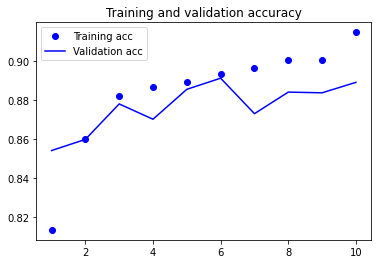

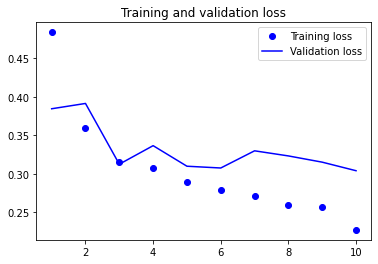

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2440299093723297, 0.9083333611488342]